In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv(r"D:\Naresit\stroke prediction.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [52]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [53]:
df.age.skew()

-0.10249737146133675

In [54]:
df.bmi.skew()

#data is right skewed

0.8987282500249906

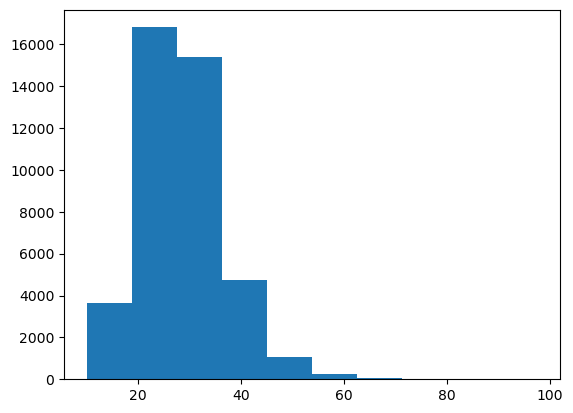

In [55]:
plt.hist(df['bmi'])
plt.show()

In [56]:
df['log_bmi'] = np.log(df['bmi'])
df['log_bmi'].skew()

# log method

-0.02169789334107705

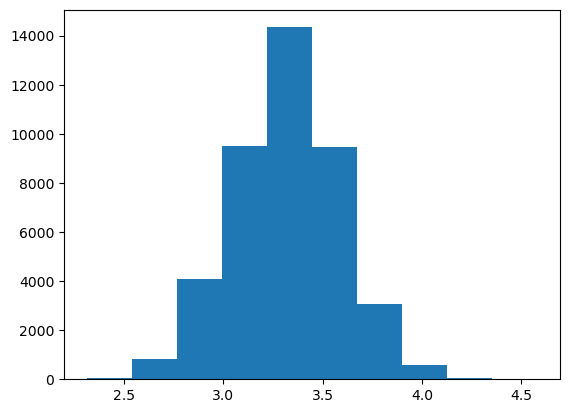

In [57]:
plt.hist(df['log_bmi'])
plt.show()

# check it normal distubuted or not

In [58]:
df['root_bmi']= df['bmi']**(1/20)
df['root_bmi'].skew()
#root method transformation, root may be nth value

0.019808770720716587

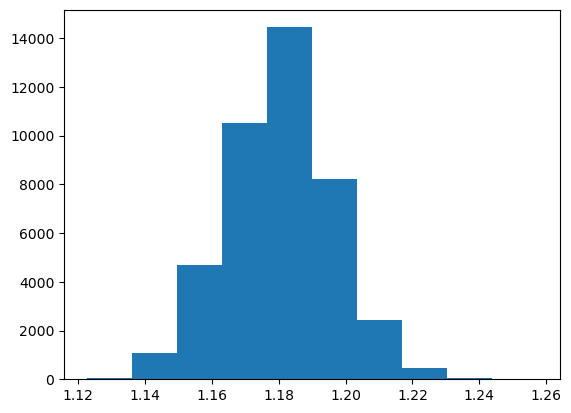

In [59]:
plt.hist(df['root_bmi'])
plt.show()

In [60]:
df['rec_bmi']= 1/(df['bmi'])
df['rec_bmi'].skew()

# reciporacal method x = 1/x

0.8330425304854784

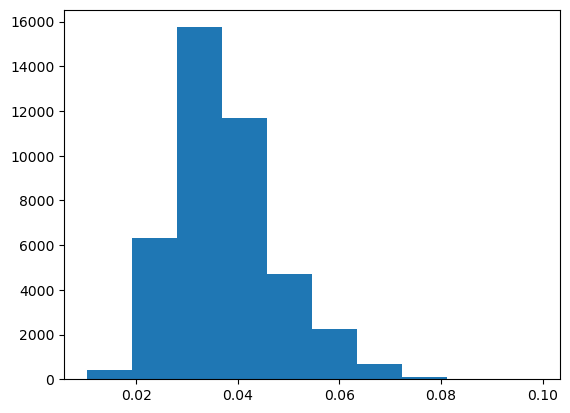

In [61]:
plt.hist(df['rec_bmi'])
plt.show()

In [62]:
from scipy.stats import boxcox

df['age_boxcox'],param = boxcox(df['age'])
print("lambada = ", param)
df['age_boxcox'].skew()


lambada =  0.8107251328721137


-0.3115789819991526

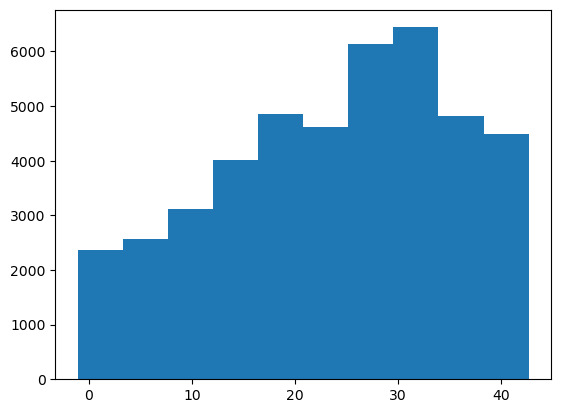

In [63]:
plt.hist(df['age_boxcox'])
plt.show()

In [64]:
data = pd.read_csv(r"D:\Naresit\titanic.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
data['Fare'].skew()

4.787316519674893

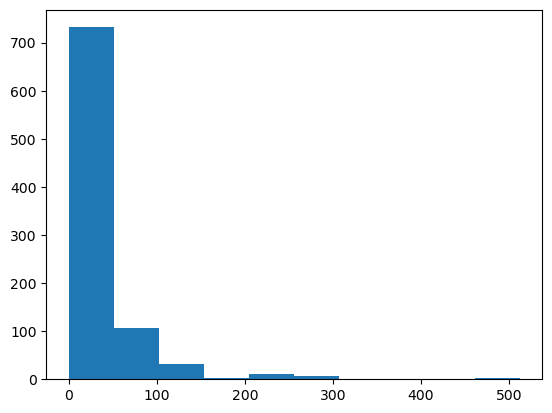

In [67]:
plt.hist(data['Fare'])
plt.show()

In [68]:


data['Fare_boxcox'],param = boxcox(data['Fare']+0.1)
print("lambada = ", param)
data['Fare_boxcox'].skew()


lambada =  0.1072698119406906


0.11308000841984724

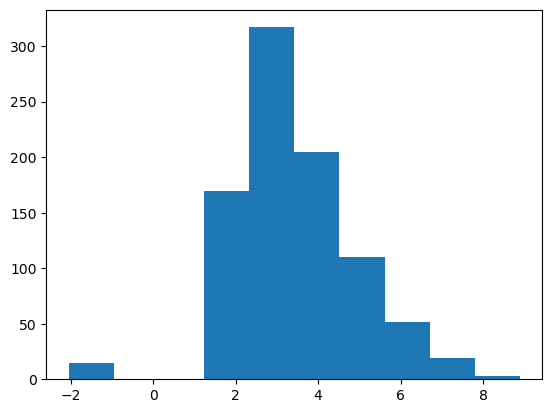

In [69]:


plt.hist(data['Fare_boxcox'])
plt.show()


In [70]:
# standard scaler

from sklearn.preprocessing import StandardScaler


sc=StandardScaler()

data['Fare_sc'] = sc.fit_transform(data[['Fare']])
data['Fare_sc']

0     -0.502445
1      0.786845
2     -0.488854
3      0.420730
4     -0.486337
         ...   
886   -0.386671
887   -0.044381
888   -0.176263
889   -0.044381
890   -0.492378
Name: Fare_sc, Length: 891, dtype: float64